## Target

This project aims to figure out some specific relations between the variables and the price, and try to build a model to predict price using linear regression.

Most inspired by the 'full of logic' Kenerl ["Melbourne Housing Market EDA and Regression".](https://www.kaggle.com/stephaniestallworth/melbourne-housing-market-eda-and-regression)


## Data pre-processing

load the data and understand what these features are.

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

data_file_path = './housing.csv'
dataframe = pd.read_csv(data_file_path) 

In [7]:
print(dataframe.shape)

dataframe.head()

(29217, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### 1. Variable types

In [9]:
#dataframe.dtypes
dataframe.info() 
#better than the dtypes: the entry amount attrib

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29217 entries, 0 to 29216
Data columns (total 21 columns):
Suburb           29217 non-null object
Address          29217 non-null object
Rooms            29217 non-null int64
Type             29217 non-null object
Price            22850 non-null float64
Method           29217 non-null object
SellerG          29217 non-null object
Date             29217 non-null object
Distance         29217 non-null float64
Postcode         29217 non-null int64
Bedroom2         22665 non-null float64
Bathroom         22659 non-null float64
Car              22357 non-null float64
Landsize         19649 non-null float64
BuildingArea     11817 non-null float64
YearBuilt        13473 non-null float64
CouncilArea      29215 non-null object
Lattitude        22878 non-null float64
Longtitude       22878 non-null float64
Regionname       29215 non-null object
Propertycount    29215 non-null float64
dtypes: float64(11), int64(2), object(8)
memory usage: 4.7+ MB


In [11]:
print(dataframe.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


### 2. Categorical Variables
From the above outcome, several certain variables: 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'  will need to be specified as categories rather than the general object.

And 'Date' as date object.

In [16]:
obj_cate = dataframe.select_dtypes(['object']).columns

for obj in obj_cate:
    dataframe[obj] = dataframe[obj].astype('category')
    
dataframe['Date'] = pd.to_datetime(dataframe['Date'])

dataframe.select_dtypes(['category']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea',
       'Regionname'],
      dtype='object')

### 3. Numeric Variables

get the statistical summary first

In [17]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,29217.0,3.013451e+00,0.975952,1.00000,2.0000,3.0000,4.000000e+00,1.600000e+01
Price,22850.0,1.056543e+06,646613.712767,85000.00000,637000.0000,880000.0000,1.300000e+06,1.120000e+07
Distance,29217.0,1.082652e+01,6.501154,0.00000,6.3000,10.1000,1.380000e+01,4.810000e+01
Postcode,29217.0,3.113518e+03,102.778677,3000.00000,3049.0000,3103.0000,3.152000e+03,3.978000e+03
Bedroom2,22665.0,3.029605e+00,0.996666,0.00000,2.0000,3.0000,4.000000e+00,3.000000e+01
Bathroom,22659.0,1.601174e+00,0.721436,0.00000,1.0000,1.0000,2.000000e+00,1.200000e+01
Car,22357.0,1.682784e+00,0.995973,0.00000,1.0000,2.0000,2.000000e+00,2.600000e+01
Landsize,19649.0,5.811614e+02,3591.192385,0.00000,200.0000,486.0000,6.650000e+02,4.330140e+05
BuildingArea,11817.0,1.574227e+02,427.686929,0.00000,99.0000,132.0000,1.840000e+02,4.451500e+04
YearBuilt,13473.0,1.964938e+03,37.421665,1196.00000,1940.0000,1970.0000,2.000000e+03,2.106000e+03


In [18]:
dataframe['Postcode'] = dataframe['Postcode'].astype('category')

In [19]:
#check again now

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29217 entries, 0 to 29216
Data columns (total 21 columns):
Suburb           29217 non-null category
Address          29217 non-null category
Rooms            29217 non-null int64
Type             29217 non-null category
Price            22850 non-null float64
Method           29217 non-null category
SellerG          29217 non-null category
Date             29217 non-null datetime64[ns]
Distance         29217 non-null float64
Postcode         29217 non-null category
Bedroom2         22665 non-null float64
Bathroom         22659 non-null float64
Car              22357 non-null float64
Landsize         19649 non-null float64
BuildingArea     11817 non-null float64
YearBuilt        13473 non-null float64
CouncilArea      29215 non-null category
Lattitude        22878 non-null float64
Longtitude       22878 non-null float64
Regionname       29215 non-null category
Propertycount    29215 non-null float64
dtypes: category(8), datetime64[ns](1)

In [20]:
# extra processing

dataframe['Age'] = 2018 - dataframe['YearBuilt']

### 4. Missing Data

In [21]:
dataframe.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6367
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          6552
Bathroom          6558
Car               6860
Landsize          9568
BuildingArea     17400
YearBuilt        15744
CouncilArea          2
Lattitude         6339
Longtitude        6339
Regionname           2
Propertycount        2
Age              15744
dtype: int64

In [29]:
#drop the entries with missing data

dataframe = dataframe.dropna()

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7696 entries, 2 to 29212
Data columns (total 22 columns):
Suburb           7696 non-null category
Address          7696 non-null category
Rooms            7696 non-null int64
Type             7696 non-null category
Price            7696 non-null float64
Method           7696 non-null category
SellerG          7696 non-null category
Date             7696 non-null datetime64[ns]
Distance         7696 non-null float64
Postcode         7696 non-null category
Bedroom2         7696 non-null float64
Bathroom         7696 non-null float64
Car              7696 non-null float64
Landsize         7696 non-null float64
BuildingArea     7696 non-null float64
YearBuilt        7696 non-null float64
CouncilArea      7696 non-null category
Lattitude        7696 non-null float64
Longtitude       7696 non-null float64
Regionname       7696 non-null category
Propertycount    7696 non-null float64
Age              7696 non-null float64
dtypes: category(8), 

### 5. Range Confirm

From the numeric describe form, we can figure out the rational value range for each variable.

In [25]:
dataframe.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,7696.0,3.041710e+00,0.976635,1.00000,2.00000,3.000000,4.000000e+00,1.200000e+01
Price,7696.0,1.087496e+06,680043.963462,131000.00000,635000.00000,895000.000000,1.340250e+06,9.000000e+06
Distance,7696.0,1.066036e+01,6.405592,0.00000,6.30000,9.700000,1.360000e+01,4.740000e+01
Bedroom2,7696.0,3.018321e+00,0.978284,0.00000,2.00000,3.000000,4.000000e+00,1.200000e+01
Bathroom,7696.0,1.620062e+00,0.723419,1.00000,1.00000,2.000000,2.000000e+00,9.000000e+00
Car,7696.0,1.646440e+00,0.961437,0.00000,1.00000,2.000000,2.000000e+00,1.000000e+01
Landsize,7696.0,5.098569e+02,1013.337512,0.00000,188.00000,452.000000,6.500000e+02,4.046900e+04
BuildingArea,7696.0,1.463098e+02,89.697001,0.00000,96.00000,129.000000,1.760000e+02,3.112000e+03
YearBuilt,7696.0,1.964966e+03,37.310265,1196.00000,1940.00000,1970.000000,2.000000e+03,2.018000e+03
Lattitude,7696.0,-3.780629e+01,0.085010,-38.17436,-37.85740,-37.800530,-3.775280e+01,-3.740720e+01


From the form, the min of 'BuildingArea' and 'Landsize', and the max of 'Age' deserve future check. 

In [32]:
dataframe[dataframe['BuildingArea']==0].shape

(37, 22)

In [33]:
dataframe[dataframe['Landsize']==0].shape

(1015, 22)

In [34]:
dataframe[dataframe['Age']>=800].shape

(1, 22)

From above tuples we can find that, the 0 of landsize makes up to about 14%, while the 0 of buildingarea can be ignored, then we can use the 'BuildingAre > 0' as the lower range.

## Analysis

### 1. Univariate

Check the dependent variable -- Price 

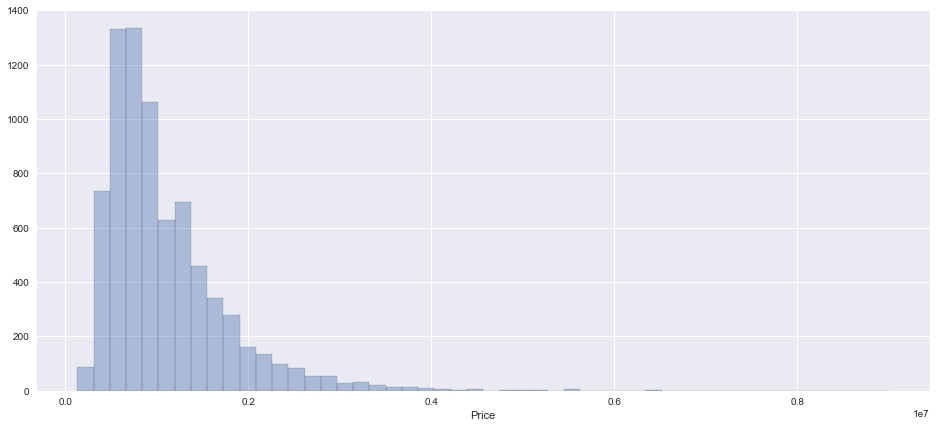

In [43]:
plt.figure(figsize=(16, 7))
x = pd.Series(dataframe['Price'], name = 'Price')
sns.distplot(x, kde = False, hist_kws = dict(edgecolor = "k"))

### 2. Bivariate

separated by categorical and numerical 

In [44]:
dataframe.select_dtypes(['category']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Postcode',
       'CouncilArea', 'Regionname'],
      dtype='object')

Suburb, Regionname, Address, and Postcode are based on location. From prior knowledge, Regionname can represent the location feature best.

In [45]:
dataframe['Regionname'] = dataframe['Regionname'].map({'Northern Metropolitan':'NM',
                                            'Western Metropolitan':'WM', 
                                            'Southern Metropolitan':'SM', 
                                            'Eastern Metropolitan':'EM', 
                                            'South-Eastern Metropolitan':'SEM', 
                                            'Northern Victoria':'NV',
                                            'Eastern Victoria':'EV',
                                            'Western Victoria':'WV'})

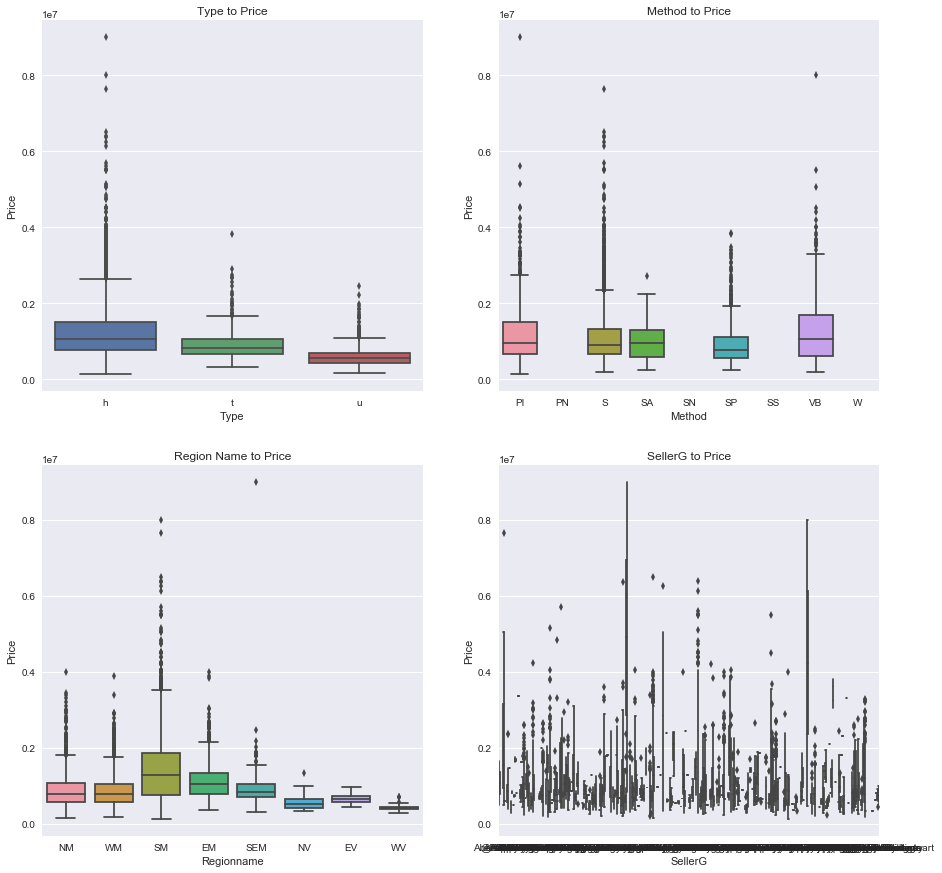

In [48]:
# Suplots of categorical features 
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# [0,0]
sns.boxplot(data = dataframe, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type to Price')

# [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = dataframe, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method to Price')

# [1,0]
sns.boxplot(x = 'Regionname', y = 'Price', data = dataframe, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name to Price')

# [1,1]
sns.boxplot(x = 'SellerG', y = 'Price', data = dataframe, ax = axes[1,1])
axes[1,1].set_xlabel('SellerG')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('SellerG to Price')


plt.show()

#### Insights

For Type pic: Median prices for houses are over 1M, townhomes are around 850K and units are approx 500k.(dollars)

For Method pic: Home prices with different selling methods are relatively the same, VB appears a little better.

For Region pic: Whole performance in median prices in the Metropolitan Region(ended with M) are better than than that of Victoria Region(ended with V); And Southern Metro has the highest median home price.

For Sellers pic: There are so many people to get a bad outcome. 

In [50]:
#numeric

dataframe.select_dtypes(['float64', 'int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

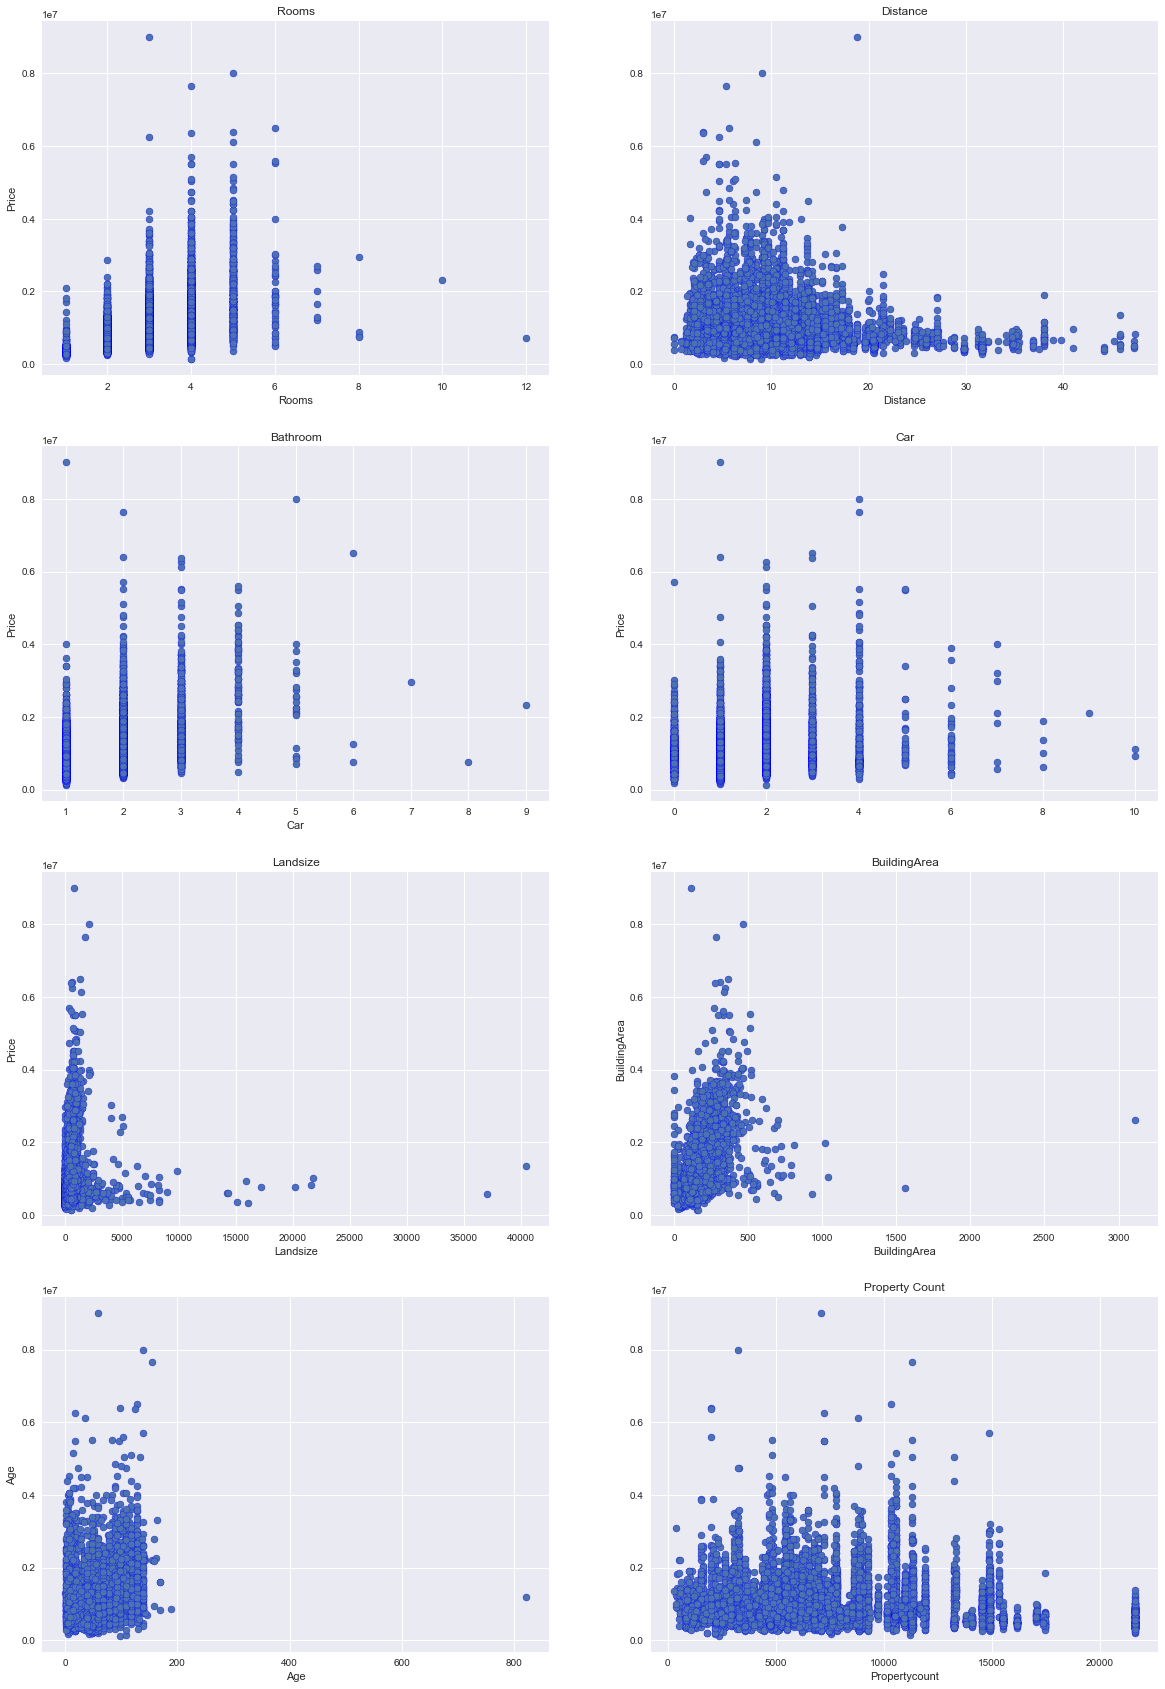

In [51]:
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = dataframe, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = dataframe, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = dataframe, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = dataframe, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = dataframe, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = dataframe, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = dataframe, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = dataframe, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count')

plt.show()

#### Insights

The most remarkable correlation is that there is a negative one between Distance from CBD and Price. 

The expensive houses (2M or more) almost are within 20km of the CBD.

### 3. Check Correlation
for all the variables

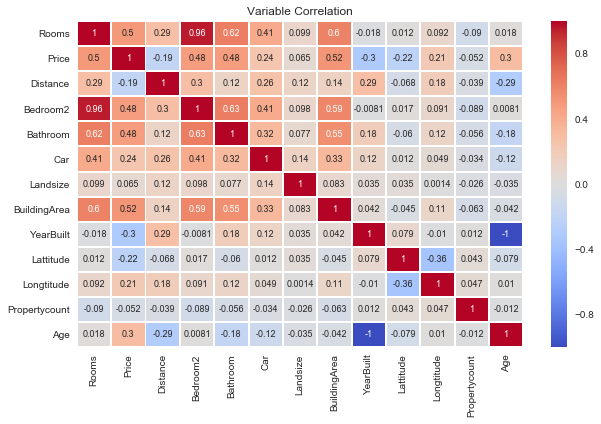

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(dataframe.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')


**weak positive**
         
age - price

**moderate positive**
           
rooms, bathrooms, building area - price      

among the above three

### 4. Linear Regression

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#create independent variables
X = dataframe[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','Age']]

#dependent variable 
y = dataframe['Price']

#Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

#Fit model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

#predict 
y_pred = regressor.predict(X_test)

#error: from predict one to the test.
print('MSE : ', metrics.mean_squared_error(y_test, y_pred))

#R squred: how much of test value can be explained by the model.
print('R^2 = ', metrics.explained_variance_score(y_test, y_pred))

MSE :  242607083343.0
R^2 =  0.462987516311


In [59]:
# Cofficients

cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,124486.533343
Distance,-28691.701543
Bathroom,226010.224854
Car,51636.962242
Landsize,22.724035
BuildingArea,2628.780088
Propertycount,-0.767653
Age,5191.777170
